<a href="https://colab.research.google.com/github/VeerVikramSingh/ML/blob/master/Fraudlent_Transactional_Analysis___its_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction**

In this technological era, society is becoming more cashless. According to the World Payment Report 2019, global non-cash transaction volumes grew a 12% during 2016-17 to reach 539 billion - the highest in past two decades:

Emerging markets led the growth charge. Emerging Asia (32%) and CEMEA (19%) were highest in global non-cash transaction volumes. CEMEA is an acronym for Central and Eastern Europe, Middle East and Africa.
Mature markets, including mature APAC, Europe and North America maintained a growth rate of nearly 7% which aligns with predictions for these markets.

**Problem Statement**

Mobile money transactions are emerging rapidly in the era of Intelligent Machines, while on the flip side fraudulent transactions are on the rise as well. Even with the updated security measures, we are still facing an issue of very high amount of money loss

** Scenario**

Scenario:
Let's say a company named as IPAYU has been providing it's financial services to the variety of users in a country. But at the same time there are loopholes in security measures (in the meanwhile company is upgrading it's security). Fraudster might try to crack inside the company's interface and can commit fraudulent transactions. It may harm people trust towards the company. To tackle this situation of crisis, they have consulted a team of data scientists.

Now the question is how this problem could be solved using data science? While there are many ways to prevent the fraud and loss occur. Let's walk through a simple pave how this team handled problem of fraudulent transaction to identify and automate model for future transactions.

The target feature in the acquired data set is check_fraud over the customer transactions.

Target Feature	Potential Values
check_fraud	0: Not Fraud
1: Fraud

**Import Libraries**

In [1]:
!pip install -q datascience                   # Package that is required by pandas profiling
!pip install -q pandas-profiling              # Library to generate basic statistics about data
!pip install -q yellowbrick                   # A visualization library for Machine Learning

     |████████████████████████████████| 71kB 2.1MB/s 


In [2]:
!pip install -q --upgrade pandas-profiling 

     |████████████████████████████████| 245kB 2.9MB/s 
     |████████████████████████████████| 1.5MB 8.7MB/s 
     |████████████████████████████████| 61kB 181kB/s 
     |████████████████████████████████| 61kB 8.5MB/s 
     |████████████████████████████████| 61kB 8.2MB/s 
     |████████████████████████████████| 8.7MB 17.2MB/s 
     |████████████████████████████████| 614kB 49.9MB/s 
     |████████████████████████████████| 296kB 50.8MB/s 
ERROR: google-colab 1.0.0 has requirement requests~=2.21.0, but you'll have requests 2.23.0 which is incompatible.


**Importing Libraries**

In [3]:
# For Panel Data Analysis
import pandas as pd
from pandas_profiling import ProfileReport
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# For Numerical Python
import numpy as np

# For Random Data
from random import randint

# For Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# For scientific calculations
from scipy import stats

# For Data Model Development
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier

# To handle class imbalance problem
from imblearn.over_sampling import SMOTE

# For Machine Learning Model Evaluation
from xgboost import plot_importance, to_graphviz
from sklearn.metrics import classification_report
from yellowbrick.classifier import PrecisionRecallCurve

# To Disable Warnings
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be import

**Data Acquisition & Description**

In [0]:
LINK = 'https://storage.googleapis.com/industryanalytics/trans_fraud_data.csv'

def load_fraud_data(link = LINK):
  return pd.read_csv(filepath_or_buffer = link)

In [7]:
data = load_fraud_data(LINK)
print('Data Shape:', data.shape)
data.head()

Data Shape: (6362620, 10)


,step,trans_type,trans_amount,sender_name,sender_old_bal,sender_new_bal,receiver,receiver_old_bal,receiver_new_bal,check_fraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [8]:
data.describe()

,step,trans_amount,sender_old_bal,sender_new_bal,receiver_old_bal,receiver_new_bal,check_fraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00


**OBSERVATION**

The numbers are pretty large for description.

25% of data is zero for sender_old_bal, receiver_old_bal & receiver_new_bal.

50% of data is zero for sender_new_bal.

On average, transaction amount of ~ $ 179861.9 dollars have been seen moving to and fro over the accumulated data.

25% of transactions have happened with amount <=  $ 13389.57 dollars.

50% of transactions have happened with amount <=  $ 74871.94 dollars.

75% of transactions have happened with amount <=  $ 208721.5 dollars

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 10 columns):
 #   Column            Dtype  
---  ------            -----  
 0   step              int64  
 1   trans_type        object 
 2   trans_amount      float64
 3   sender_name       object 
 4   sender_old_bal    float64
 5   sender_new_bal    float64
 6   receiver          object 
 7   receiver_old_bal  float64
 8   receiver_new_bal  float64
 9   check_fraud       int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 485.4+ MB


**We can see that all the check_fraud has been identified as incorrect data type i.e. integer. But it should be boolean instead.**

**Observation:

There were no missing cells.
There were no duplicate rows.
There are 6 numerical, 3 categorical and 1 bool features.
trans_amount is found to be highy skewed.
sender_name & receiver is found to be cardinal in nature i.e. containing distinct values.
sender_old_bal is found to have 33% of zeros and sender_new_bal 56.7% of zeros.
receiver_old_bal is found to have 42.5% of zeros and receiver_new_bal 38.3% of zeros.
trans_type feature contains imbalanced classes, DEBIT type contains frequency of 41432 with respect to whole data.
Fraudulent transctions are 8213 with respect to whole data which defines the class imbalance.**

Identification & Handling of Missing Values

In [11]:
null_frame=pd.DataFrame(data.isnull().sum(),columns=["frequency"])
null_frame.T

,step,trans_type,trans_amount,sender_name,sender_old_bal,sender_new_bal,receiver,receiver_old_bal,receiver_new_bal,check_fraud
frequency,0,0,0,0,0,0,0,0,0,0


**Numerical Data Distribution**

In [19]:
num_features=[]
for i in data.columns:
  if (data[i].dtypes==int) | (data[i].dtypes==float):
    num_features.append(i)
print(len(num_features))
print(num_features)

7
['step', 'trans_amount', 'sender_old_bal', 'sender_new_bal', 'receiver_old_bal', 'receiver_new_bal', 'check_fraud']


RuntimeError: ignored

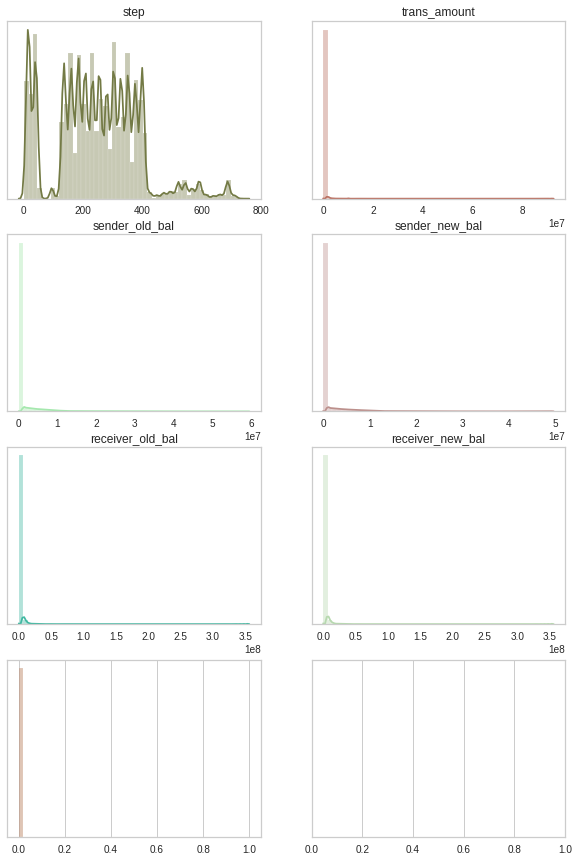

In [20]:
fig, axes = plt.subplots(nrows = 4, ncols = 2, sharex = False, figsize=(10, 15))

colors = []
for i in range(7):
  colors.append('#%06X' % randint(0, 0xFFFFFF))

for ax, col, color in zip(axes.flat, num_features, colors):
  sns.distplot(a = data[col], bins = 50, ax = ax, color = color)
  ax.set_title(col)
  plt.setp(axes, yticks=[])
  ax.set_xlabel(' ')
  ax.grid(False)
plt.tight_layout()
plt.show()

**Observation:

All numerical features are found to positively skewed except step feature.
step feature contains random distribution of data**

In [21]:
print('Contains Duplicate Rows?', data.duplicated().any())

Contains Duplicate Rows? False


In [0]:
#Observation:

#It turns out that there are no duplicate rows present in our data.

In [22]:
def duplicateCols(dataframe):
  '''Get a list of Duplicate valued Columns'''
  names = set()
  for i in range(dataframe.shape[1]):
    col1 = dataframe.iloc[:, i]
    for j in range(i+1, dataframe.shape[1]):
      col2 = dataframe.iloc[:, j]
      if col1.equals(col2):
        names.add(dataframe.columns.values[j])

  if (len(names) == 0):
    return None
  else:
    return list(names)

is_duplicate_cols = duplicateCols(data)
print('Contains Duplicate Columns?', is_duplicate_cols)

Contains Duplicate Columns? None


Observation:

It turns out that there are no duplicate columns present in our data

In [23]:
type_frame = pd.DataFrame(data = data.dtypes, columns = ['Type'])
type_frame.transpose()

,step,trans_type,trans_amount,sender_name,sender_old_bal,sender_new_bal,receiver,receiver_old_bal,receiver_new_bal,check_fraud
Type,int64,object,float64,object,float64,float64,object,float64,float64,int64


Observation:

Following features contain inconsitent data type. A symbol → represents will be changed to:
Feature [ Current Type → Desired Type ]
check_fraud [ Integer → Boolean

In [0]:
data['check_fraud'] = data['check_fraud'].astype(bool)

In [25]:
type_frame = pd.DataFrame(data = data.dtypes, columns = ['Type'])
type_frame.transpose()

,step,trans_type,trans_amount,sender_name,sender_old_bal,sender_new_bal,receiver,receiver_old_bal,receiver_new_bal,check_fraud
Type,int64,object,float64,object,float64,float64,object,float64,float64,bool


** General Transactional Analysis**

**Question 1: What is the frequency & proportion of each transaction type that has occured?**

In [29]:
trans_type_frame=pd.DataFrame(data=data["trans_type"].value_counts())
trans_type_frame

,trans_type
CASH_OUT,2237500
PAYMENT,2151495
CASH_IN,1399284
TRANSFER,532909
DEBIT,41432


In [30]:
trans_type_frame.columns=["frequency"]
trans_type_frame.T

,CASH_OUT,PAYMENT,CASH_IN,TRANSFER,DEBIT
frequency,2237500,2151495,1399284,532909,41432


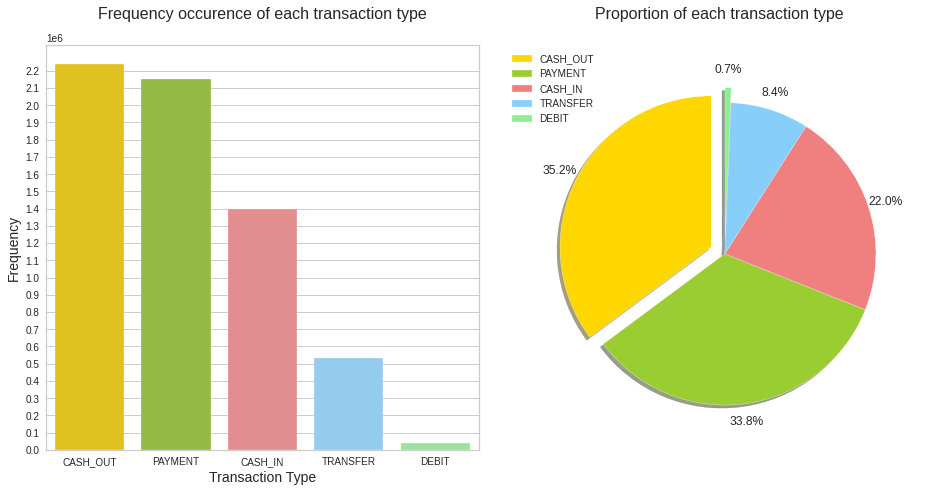

In [31]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen']
figure = plt.figure(figsize = [13.66, 7.3])
plt.subplot(1, 2, 1)
sns.barplot(data['trans_type'].value_counts().index, data['trans_type'].value_counts(), palette  = colors_list)
plt.yticks(range(0, 2300000, 100000))
plt.xlabel('Transaction Type', size = 14)
plt.ylabel('Frequency', size = 14)
plt.title('Frequency occurence of each transaction type', y=1.05, size = 16)

explode_list = [0.1, 0, 0, 0, 0.1]

plt.subplot(1, 2, 2)
data['trans_type'].value_counts().plot(kind='pie', figsize=[13.66, 7.3], autopct='%1.1f%%', 
                                       startangle=90, shadow=True, labels=None, pctdistance=1.12, colors=colors_list, explode=explode_list)
plt.title('Proportion of each transaction type', y=1.05, size = 16)
plt.ylabel('')
plt.axis('equal')
plt.legend(labels = data['trans_type'].value_counts().index, loc = 'upper left', frameon=False)
plt.tight_layout(pad=2.0)
plt.show()

Observation:

We can see that CASH_OUT transactions occured more than any other type of transaction in i.e. around 35%.

**Question 2: What is the average amount that has been transfered using each transaction type?**

In [36]:
frame = data[['trans_type', 'trans_amount']].groupby('trans_type').mean().reset_index()
trans_amount_frame = pd.DataFrame(frame)
frame.columns = ['Transaction Type', 'Average Transacted Amount']
trans_amount_frame['Total Sum Amount'] = data[['trans_type', 'trans_amount']].groupby('trans_type').agg('sum').values
trans_amount_frame['Total Transactions'] = data[['trans_type', 'trans_amount']].groupby('trans_type').count().values
trans_amount_frame.transpose()

,0,1,2,3,4
Transaction Type,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
Average Transacted Amount,168920,176274,5483.67,13057.6,910647
Total Sum Amount,2.36367e+11,3.94413e+11,2.27199e+08,2.80934e+10,4.85292e+11
Total Transactions,1399284,2237500,41432,2151495,532909


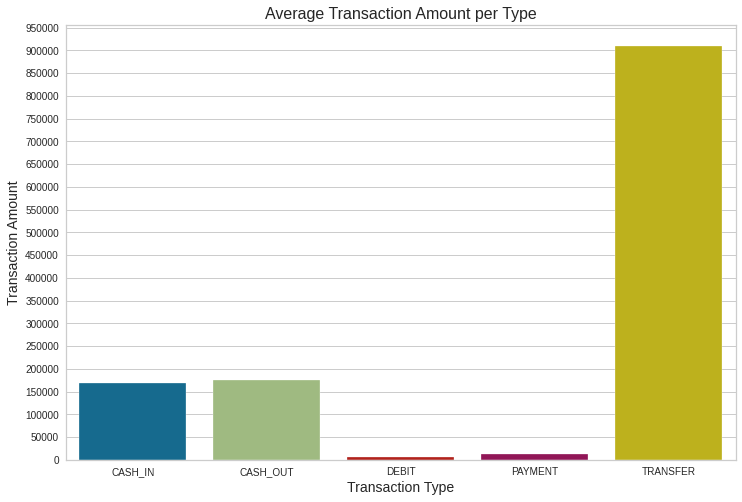

In [37]:
figure = plt.figure(figsize = [12, 8])
ax = sns.barplot(x = 'Transaction Type', y = 'Average Transacted Amount', data = trans_amount_frame)

plt.xlabel('Transaction Type', size = 14)
plt.ylabel('Transaction Amount', size = 14)
plt.yticks(range(0, 1000000, 50000))
plt.title('Average Transaction Amount per Type', size = 16)
plt.show()

Observation:

From above it is clearly visible that on average most of the money has moved to and fro on TRANSFER type of transactions i.e.  $ 910647 dollars.

**Question 3: What is the proportion of customers who are fraud and who are not?**

Customers who are not fraud: 6354407
Customers who are fraud: 8213


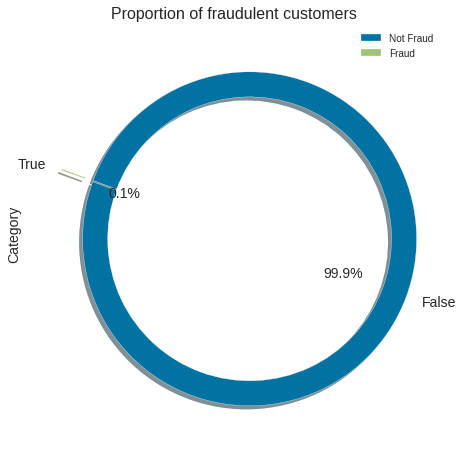

In [38]:
print('Customers who are not fraud:', data['check_fraud'].value_counts()[0])
print('Customers who are fraud:', data['check_fraud'].value_counts()[1])

space = np.ones(2)/10
data['check_fraud'].value_counts().plot(kind = 'pie', explode = space, fontsize = 14, autopct = '%3.1f%%', wedgeprops = dict(width=0.15), 
                                    shadow = True, startangle = 160, figsize = [13.66, 7.68], legend = True)
plt.legend(['Not Fraud', 'Fraud'])
plt.ylabel('Category', size = 14)
plt.title('Proportion of fraudulent customers', size = 16)
plt.show()

Observation:

As it can be seen that there is high imbalance in clases.
Only 0.1% of transactions are fraudulent with respect to all other transactions.

**Question 4: What is the frequency distribution of transactions types happened with respect to customer being fraud?**

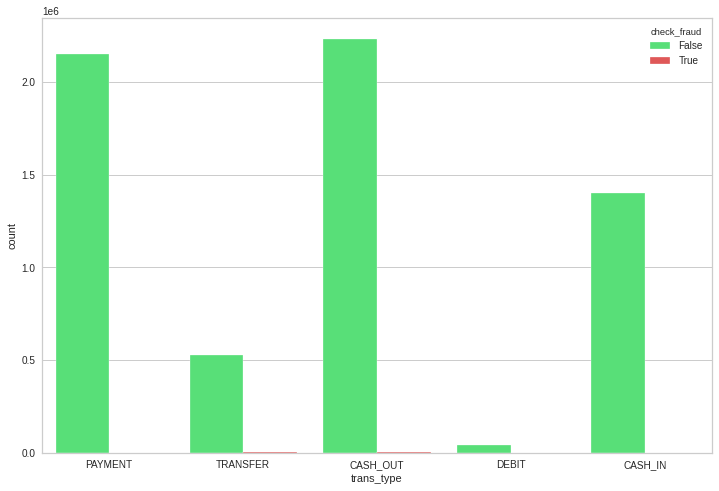

In [40]:
plt.figure(figsize = [12, 8])

sns.countplot(x = 'trans_type', hue = 'check_fraud', data = data, palette = ['#42f56c', '#f54242'])

From the above visual it can be easily interpreted that fruaudulent transactions happened only in CASH_OUT and TRANSFER type of transactions. So we will focus more deeply on these type of transactions.

In [41]:
data.head(2)

,step,trans_type,trans_amount,sender_name,sender_old_bal,sender_new_bal,receiver,receiver_old_bal,receiver_new_bal,check_fraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,False
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,False


In [46]:
min_amount = data.loc[data['check_fraud'] == 1]['trans_amount'].min()
max_amount = data.loc[data['check_fraud'] == 1]['trans_amount'].max()
print('Minimum amount transacted as fraudulent =', min_amount)
print('Maximum amount transacted as fraudulent =', max_amount)

Minimum amount transacted as fraudulent = 0.0
Maximum amount transacted as fraudulent = 10000000.0


**Question 6: What is the minimumn & maximum transaction amount identified as non-fraudulent transaction?**

In [47]:
min_amount = data.loc[data['check_fraud'] == 0]['trans_amount'].min()
max_amount = data.loc[data['check_fraud'] == 0]['trans_amount'].max()
print('Minimum amount transacted fails to identify as fraudulent =', min_amount)
print('Maximum amount transacted fails to identify as fraudulent =', max_amount)

Minimum amount transacted fails to identify as fraudulent = 0.01
Maximum amount transacted fails to identify as fraudulent = 92445516.64


We can see that most of the fraudulent transactions happened in TRANSFER & CASH_OUT type. So let's analyze TRANSFER type of transactions.

In [48]:
data_transfer = data[data['trans_type'] == 'TRANSFER']
data_flagged = data[data['check_fraud'] == 1]
data_notflagged = data[data['check_fraud'] == 0]
print('TRANSFER Data Shape:', data_transfer.shape)
print('Flagged data Shape:', data_flagged.shape)
print('Not Flagged data Shape:', data_notflagged.shape)
data_transfer.head()

TRANSFER Data Shape: (532909, 10)
Flagged data Shape: (8213, 10)
Not Flagged data Shape: (6354407, 10)


,step,trans_type,trans_amount,sender_name,sender_old_bal,sender_new_bal,receiver,receiver_old_bal,receiver_new_bal,check_fraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,True
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,False
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,False
58,1,TRANSFER,62610.80,C1976401987,79114.00,16503.2,C1937962514,517.00,8383.29,False
78,1,TRANSFER,42712.39,C283039401,10363.39,0.0,C1330106945,57901.66,24044.18,False


Let's analyze the features assocation in TRANSFER type of transaction.

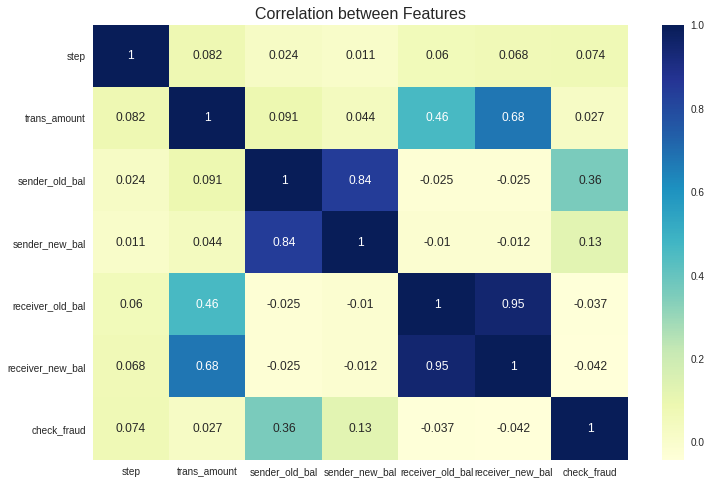

In [49]:
figure = plt.figure(figsize = [12, 8])
sns.heatmap(data = data_transfer.corr(), annot = True, cmap = 'YlGnBu')
plt.title('Correlation between Features', size = 16)
plt.show()

Observation:

trans_amount and receiver_new_bal feature seems to be moderately correlated.
sender_old_bal and sender_new_bal feature seems to be highly correlated.
receiver_old_bal and receiver_new_bal feature seems to be highly correlated as well.

**Question 7: How much money has been laundered at different amounts of chunks?**

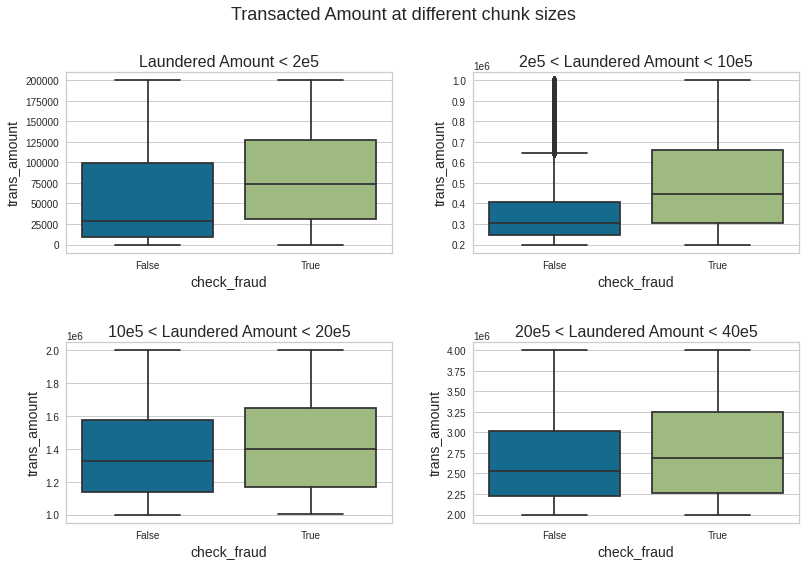

In [50]:
figure = plt.figure(figsize = [12, 8])
plt.subplot(2, 2, 1)
sns.boxplot(x = 'check_fraud', y = 'trans_amount', data = data[data['trans_amount'] < 2e5])
plt.xlabel('check_fraud', size = 14)
plt.ylabel('trans_amount', size = 14)
plt.title('Laundered Amount < 2e5', size = 16)

plt.subplot(2, 2, 2)
sns.boxplot(x = 'check_fraud', y = 'trans_amount', data = data[(data['trans_amount'] > 2e5) & (data['trans_amount'] < 10e5)])
plt.xlabel('check_fraud', size = 14)
plt.ylabel('trans_amount', size = 14)
plt.title('2e5 < Laundered Amount < 10e5', size = 16)

plt.subplot(2, 2, 3)
sns.boxplot(x = 'check_fraud', y = 'trans_amount', data = data[(data['trans_amount'] > 10e5) & (data['trans_amount'] < 20e5)])
plt.xlabel('check_fraud', size = 14)
plt.ylabel('trans_amount', size = 14)
plt.title('10e5 < Laundered Amount < 20e5', size = 16)

plt.subplot(2, 2, 4)
sns.boxplot(x = 'check_fraud', y = 'trans_amount', data = data[(data['trans_amount'] > 20e5) & (data['trans_amount'] < 40e5)])
plt.xlabel('check_fraud', size = 14)
plt.ylabel('trans_amount', size = 14)
plt.title('20e5 < Laundered Amount < 40e5', size = 16)

plt.suptitle('Transacted Amount at different chunk sizes', size = 18, y = 1.02)
plt.tight_layout(pad = 3.0)
plt.show()

Observation:

We can see that the median values of being fraud are high than the median values of not fraud.
But we're not able to make any much inference so let's explore further.

In [51]:
print('(check_fraud = 1, Min):', data_transfer[data_transfer['check_fraud'] == 1]['sender_old_bal'].min())
print('(check_fraud = 1, Max):', data_transfer[data_transfer['check_fraud'] == 1]['sender_old_bal'].max())
print('(check_fraud = 0, Min):', data_transfer[data_transfer['check_fraud'] == 0]['sender_old_bal'].min())
print('(check_fraud = 0, Max):', data_transfer[data_transfer['check_fraud'] == 0]['sender_old_bal'].max())

(check_fraud = 1, Min): 0.0
(check_fraud = 1, Max): 59585040.37
(check_fraud = 0, Min): 0.0
(check_fraud = 0, Max): 25908675.06


Observation:

We saw that in TRANSFER type of data -

(Non-Fraudulent): The minimum amount of sender side was 0 while maximum amount was ~26 million dollars.
(Fraudulent): The minimum amount of sender side was 0 while maximum amount was ~59 million dollars.
In the next section we will analyze the data around merchant and customer & how fraudster commited fruad.

**Customer & Merchant Transactional Analysis**

**Question 1: Have the receiver side of transactions been flagged as fraud inititated by other transactions?**

In [58]:
print(data_flagged["receiver"].isin (data_notflagged["sender_name"]).any())

True


In [59]:
print(data_flagged["receiver"].isin(data_notflagged["sender_name"]).sum())

18


Observation:

It turns out that there are 18 such transactions that have been marked fraudulent initiated by other transactions.

**Question 2: How many receiver side of transactions have been flagged as fraud more than once?**

In [0]:
frequency=data_flagged["receiver"].isin(data_notflagged["receiver"]).sum()

In [63]:
percent=np.round(frequency/len(data_flagged),decimals=2)*100
print(frequency)
print(percent)

5532
67.0


Observation:

Around 67.4% of flagged transactions are in not flagged data on the receiver side of the transactions.

**Question 3: Are there any merchants among sender accounts for CASH_IN transactions?**

In [66]:
data.head()

,step,trans_type,trans_amount,sender_name,sender_old_bal,sender_new_bal,receiver,receiver_old_bal,receiver_new_bal,check_fraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,False
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,False
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,True
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,True
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,False


In [67]:
print(data[data["trans_type"]=="CASH_IN"]["sender_name"].str.contains("M").any())

False


In [68]:
print(data[data["trans_type"]=="CASH_IN"]["sender_name"].str.contains("M").any())

False


Observation:

It turns out that there aren't any transactions with merchant with CASH_IN type on sender side.

**Question 4: Are there any sender & receiver accounts among merchants for each type of transaction?**

In [69]:
print('-----CASH_OUT-----')
print('Sender side?', data[data['trans_type'] == 'CASH_OUT']['sender_name'].str.contains('M').any())
print('Receiver side?', data[data['trans_type'] == 'CASH_OUT']['receiver'].str.contains('M').any())

print('-----CASH_IN-----')
print('Sender side?', data[data['trans_type'] == 'CASH_IN']['sender_name'].str.contains('M').any())
print('Receiver side?', data[data['trans_type'] == 'CASH_IN']['receiver'].str.contains('M').any())

print('-----DEBIT-----')
print('Sender side?', data[data['trans_type'] == 'DEBIT']['sender_name'].str.contains('M').any())
print('Receiver side?', data[data['trans_type'] == 'DEBIT']['receiver'].str.contains('M').any())

print('-----TRANSFER-----')
print('Sender side?', data[data['trans_type'] == 'TRANSFER']['sender_name'].str.contains('M').any())
print('Receiver side?', data[data['trans_type'] == 'TRANSFER']['receiver'].str.contains('M').any())

print('-----PAYMENT-----')
print('Sender side?', data[data['trans_type'] == 'PAYMENT']['sender_name'].str.contains('M').any())
print('Receiver side?', data[data['trans_type'] == 'PAYMENT']['receiver'].str.contains('M').any())



-----CASH_OUT-----
Sender side? False
Receiver side? False
-----CASH_IN-----
Sender side? False
Receiver side? False
-----DEBIT-----
Sender side? False
Receiver side? False
-----TRANSFER-----
Sender side? False
Receiver side? False
-----PAYMENT-----
Sender side? False
Receiver side? True


Observation:

There are no merchants present among sender & receiver accounts for each type of transactions.
Merchants are only present in destination accounts for all PAYMENTS.

**Question 5: Is there any merchant present in the receiver account except the PAYMENT type?**

In [70]:
print('-----CASH_OUT (Fruad = 1)-----')
print('Sender side?', data[(data['trans_type'] == 'CASH_OUT') & data['check_fraud'] == 1]['sender_name'].str.contains('M').any())
print('Receiver side?', data[(data['trans_type'] == 'CASH_OUT') & data['check_fraud'] == 1]['receiver'].str.contains('M').any())

print('\n-----CASH_OUT (Fraud = 0)-----')
print('Sender side?', data[(data['trans_type'] == 'CASH_OUT') & data['check_fraud'] == 0]['sender_name'].str.contains('M').any())
print('Receiver side?', data[(data['trans_type'] == 'CASH_OUT') & data['check_fraud'] == 0]['receiver'].str.contains('M').any())

-----CASH_OUT (Fruad = 1)-----
Sender side? False
Receiver side? False

-----CASH_OUT (Fraud = 0)-----
Sender side? False
Receiver side? True


In [71]:
data.head(2)

,step,trans_type,trans_amount,sender_name,sender_old_bal,sender_new_bal,receiver,receiver_old_bal,receiver_new_bal,check_fraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,False
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,False


In [72]:
data[(data["trans_type"]=="TRANSFER")&(data["check_fraud"]==1)].head()

,step,trans_type,trans_amount,sender_name,sender_old_bal,sender_new_bal,receiver,receiver_old_bal,receiver_new_bal,check_fraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.0,0.0,True
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.0,0.0,True
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.0,0.0,True
969,1,TRANSFER,1277212.77,C1334405552,1277212.77,0.0,C431687661,0.0,0.0,True
1115,1,TRANSFER,35063.63,C1364127192,35063.63,0.0,C1136419747,0.0,0.0,True


In [73]:
data[(data["trans_type"]=="CASH_OUT")&(data["check_fraud"]==1)].head()

,step,trans_type,trans_amount,sender_name,sender_old_bal,sender_new_bal,receiver,receiver_old_bal,receiver_new_bal,check_fraud
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.0,0.00,True
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.0,0.00,True
681,1,CASH_OUT,20128.00,C1118430673,20128.00,0.0,C339924917,6268.0,12145.85,True
724,1,CASH_OUT,416001.33,C749981943,0.00,0.0,C667346055,102.0,9291619.62,True
970,1,CASH_OUT,1277212.77,C467632528,1277212.77,0.0,C716083600,0.0,2444985.19,True


In [74]:
data_trans_fraud = data[(data['trans_type'] == 'TRANSFER') & (data['check_fraud'] == 1)]
data_cashout_fraud = data[(data['trans_type'] == 'CASH_OUT') & (data['check_fraud'] == 1)]
print(data_trans_fraud['receiver'].isin(data_cashout_fraud['sender_name']).any())

False


In [75]:
notFraud = data.loc[data['check_fraud'] == 0]
isFraud = data.loc[data['check_fraud'] == 1]
data_trans_fraud.loc[data_trans_fraud['receiver'].isin(notFraud.loc[notFraud['trans_type'] == 'CASH_OUT']['sender_name'])]

,step,trans_type,trans_amount,sender_name,sender_old_bal,sender_new_bal,receiver,receiver_old_bal,receiver_new_bal,check_fraud
1030443,65,TRANSFER,1282971.57,C1175896731,1282971.57,0.0,C1714931087,0.0,0.0,True
6039814,486,TRANSFER,214793.32,C2140495649,214793.32,0.0,C423543548,0.0,0.0,True
6362556,738,TRANSFER,814689.88,C2029041842,814689.88,0.0,C1023330867,0.0,0.0,True


In [76]:
data_1 = data.loc[(data['trans_type'] == 'TRANSFER') | (data['trans_type'] == 'CASH_OUT')].drop(['sender_name', 'receiver'], axis = 1)
print('Old Data Shape:', data.shape)
print('New Data Shape:', data_1.shape)
data_1.head()

Old Data Shape: (6362620, 10)
New Data Shape: (2770409, 8)


,step,trans_type,trans_amount,sender_old_bal,sender_new_bal,receiver_old_bal,receiver_new_bal,check_fraud
2,1,TRANSFER,181.00,181.0,0.0,0.0,0.00,True
3,1,CASH_OUT,181.00,181.0,0.0,21182.0,0.00,True
15,1,CASH_OUT,229133.94,15325.0,0.0,5083.0,51513.44,False
19,1,TRANSFER,215310.30,705.0,0.0,22425.0,0.00,False
24,1,TRANSFER,311685.89,10835.0,0.0,6267.0,2719172.89,False


In [77]:
# Let's create two dataframe that contains fraudulent as well as non-fraudulent transactions
dataFraud = data_1[data_1['check_fraud'] == 1]
dataNotFraud = data_1[data_1['check_fraud'] == 0]
print('Fraud Data Shape:', dataFraud.shape)
print('Non-Fraud Data Shape:', dataNotFraud.shape)

Fraud Data Shape: (8213, 8)
Non-Fraud Data Shape: (2762196, 8)


In [78]:
value1 = len(dataFraud.loc[(dataFraud['sender_old_bal'] == 0) & (dataFraud['sender_new_bal'] == 0) & (dataFraud['trans_amount'])]) / (1.0 * len(dataFraud))
print('The fraction of fraudulent transactions with sender_old_bal = sender_new_bal = 0 although the transacted amount is non-zero is:', np.round(value1, 4))

value2 = len(dataNotFraud.loc[(dataNotFraud['sender_old_bal'] == 0) & (dataNotFraud['sender_new_bal'] == 0) & (dataNotFraud['trans_amount'])]) / (1.0 * len(dataNotFraud))
print('\nThe fraction of genuine transactions with sender_old_bal = sender_new_bal = 0 although the transacted amount is non-zero is:', np.round(value2, 4))

The fraction of fraudulent transactions with sender_old_bal = sender_new_bal = 0 although the transacted amount is non-zero is: 0.003

The fraction of genuine transactions with sender_old_bal = sender_new_bal = 0 although the transacted amount is non-zero is: 0.4737


**Observation:

Genuine Data (sender_old_bal = sender_new_bal = 0):
We can see that genuine transactions contains ~47% of zeros.
As our data is already oversampled with genuine majority class, we can drop these records by first replacing 0s with null.
Fraudulent Data (sender_old_bal = sender_new_bal = 0):
We can see that the fraudulent transactions contain only 0.3% of zeros.
We shall also replace this value with null and later on drop these records and analyze how much data we lost for fraudulent data.**

In [0]:
# Replacing 0s with NaN values
data_1.loc[(data_1['sender_old_bal'] == 0) & (data_1['sender_new_bal'] == 0) & (data_1['trans_amount'] != 0), ['sender_old_bal', 'sender_new_bal']] = np.nan

In [80]:
value1 = len(dataFraud.loc[(dataFraud['receiver_old_bal'] == 0) & (dataFraud['receiver_new_bal'] == 0) & (dataFraud['trans_amount'])]) / (1.0 * len(dataFraud))
print('The fraction of fraudulent transactions with receiver_old_bal = receiver_new_bal = 0 although the transacted amount is non-zero is:', np.round(value1, 4))

value2 = len(dataNotFraud.loc[(dataNotFraud['receiver_old_bal'] == 0) & (dataNotFraud['receiver_new_bal'] == 0) & (dataNotFraud['trans_amount'])]) / (1.0 * len(dataNotFraud))
print('\nThe fraction of genuine transactions with receiver_old_bal = receiver_new_bal = 0 although the transacted amount is non-zero is:', np.round(value2, 4))

The fraction of fraudulent transactions with receiver_old_bal = receiver_new_bal = 0 although the transacted amount is non-zero is: 0.4956

The fraction of genuine transactions with receiver_old_bal = receiver_new_bal = 0 although the transacted amount is non-zero is: 0.0006


In [81]:
null_frame = pd.DataFrame(data_1.isnull().sum(), columns = ['Frequency'])
null_frame.transpose()

,step,trans_type,trans_amount,sender_old_bal,sender_new_bal,receiver_old_bal,receiver_new_bal,check_fraud
Frequency,0,0,0,1308566,1308566,0,0,0


In [82]:
print('Old Data Shape:', data_1.shape)
data_1.dropna(axis = 0, inplace = True)
print('New Data Shape: ', data_1.shape)
null_frame = pd.DataFrame(data_1.isnull().sum(), columns = ['Frequency'])
null_frame.transpose()

Old Data Shape: (2770409, 8)
New Data Shape:  (1461843, 8)


,step,trans_type,trans_amount,sender_old_bal,sender_new_bal,receiver_old_bal,receiver_new_bal,check_fraud
Frequency,0,0,0,0,0,0,0,0


In [83]:
data_1['errorBalanceSender'] = data_1['sender_new_bal'] + data_1['trans_amount'] - data_1['sender_old_bal']
data_1['errorBalanceReceiver'] = data_1['receiver_old_bal'] + data_1['trans_amount'] - data_1['receiver_new_bal']
print('New Data Shape:', data_1.shape)

New Data Shape: (1461843, 10)


In [90]:
# Data Split for Predictors and Target
X = data_1.drop('check_fraud', axis = 1)
y = data_1['check_fraud']

print('X Shape:', X.shape)
print('y Shape:', y.shape)

# Encoding transaction type to 0 and 1
X.loc[X['trans_type'] == 'TRANSFER', 'trans_type'] = 0
X.loc[X['trans_type'] == 'CASH_OUT', 'trans_type'] = 1
X.trans_type = X.trans_type.astype('int')

X Shape: (1461843, 9)
y Shape: (1461843,)


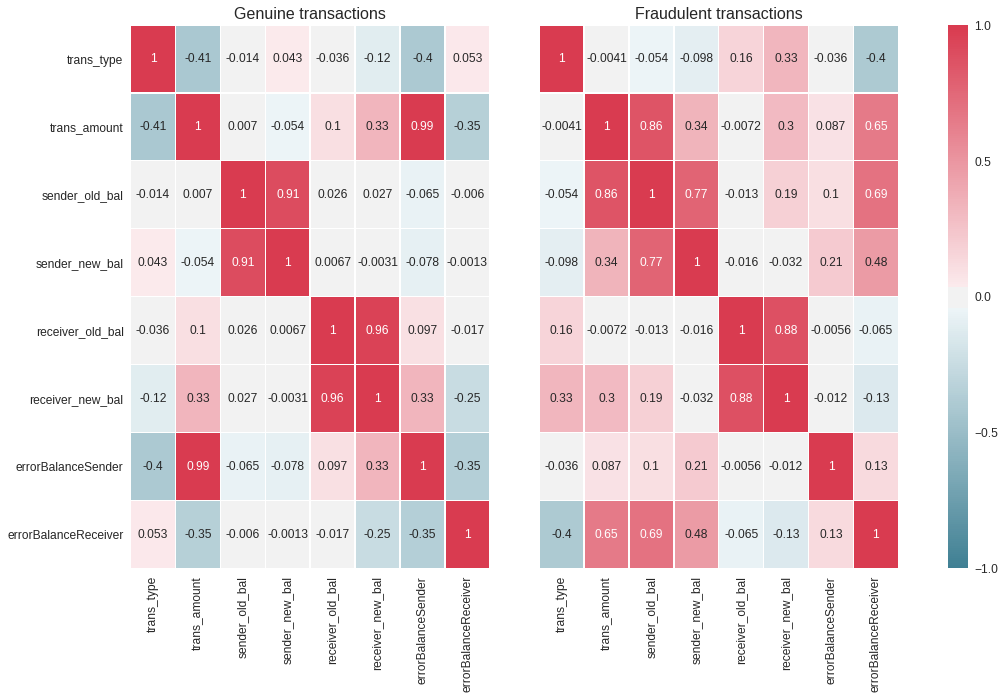

In [91]:
# Update Xfraud & XnonFraud with cleansed data
Xfraud = X.loc[y == 1] 
XnonFraud = X.loc[y == 0]

correlationNonFraud = XnonFraud.loc[:, X.columns != 'step'].corr()
correlationFraud = Xfraud.loc[:, X.columns != 'step'].corr()

grid_kws = {"width_ratios": (.9, .9, .05), "wspace": 0.2}
fig, (ax1, ax2, cbar_ax) = plt.subplots(1, 3, gridspec_kw = grid_kws, figsize = [15, 10])
cmap = sns.diverging_palette(220, 8, as_cmap=True)
                             
ax1 = sns.heatmap(correlationNonFraud, ax = ax1, vmin = -1, vmax = 1, cmap = cmap, square = False, linewidths = 0.5, cbar = False, annot = True)
ax1.set_xticklabels(ax1.get_xticklabels(), size = 12)
ax1.set_yticklabels(ax1.get_yticklabels(), size = 12)
ax1.set_title('Genuine transactions', size = 16)

ax2 = sns.heatmap(correlationFraud, ax = ax2, vmin = -1, vmax = 1, cmap = cmap, square = False, linewidths = 0.5, annot = True, 
                  yticklabels = False,  cbar_ax = cbar_ax, cbar_kws={'orientation': 'vertical',  'ticks': [-1, -0.5, 0, 0.5, 1]})
ax2.set_xticklabels(ax2.get_xticklabels(), size = 12) 
ax2.set_title('Fraudulent transactions', size = 16)

cbar_ax.set_yticklabels(cbar_ax.get_yticklabels(), size = 12)
plt.show()

Observation:

Genuine Data:

trans_amount is highly correlated with errorBalanceSender.

sender_old_bal is highly correlated with sender_new_bal.

receiver_old_bal is highly correlated with receiver_new_bal.

Fraudulent Data:

trans_amount is highly correlated with sender_old_bal.

sender_old_bal is moderately correlated with sender_new_bal.

receiver_old_bal is moderately correlated with receiver_new_bal.

errorBalanceReceiver is moderately correalted with sender_old_bal and trans_amount.

In [92]:
# Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)

Training Data Shape: (1169474, 9) (1169474,)
Testing Data Shape: (292369, 9) (292369,)


As our data is highly imbalanced, a common approach of discarding the minority class data would be good but along with that our potential information will also get lost.

An alternative would be oversampling the minority class using SMOTE (Synthetic Minority Oversampling Technique) present in python library known as imbalanced-learn.



We will create a function that will plot precision-recall curve to evaluate our model performance.

In [0]:
def PRCurve(model):
  '''
  A function to compute Precision Recall Curve
  Data to fit must be training i.e. X_train, y_train
  Data score will be estimated on X_test, y_test
  '''
  viz = PrecisionRecallCurve(model)
  viz.fit(X_train, y_train)
  avg_prec = viz.score(X_test, y_test)
  plt.legend(labels = ['Binary PR Curve',"AP=%.3f"%avg_prec], loc = 'lower right', prop={'size': 14})
  plt.xlabel(xlabel = 'Recall', size = 14)
  plt.ylabel(ylabel = 'Precision', size = 14)
  plt.title(label = 'Precision Recall Curve', size = 16)

Accuracy Score (Train Data): 0.994
Accuracy Score (Test Data): 0.994
              precision    recall  f1-score   support

       False       1.00      1.00      1.00    290731
        True       0.48      0.41      0.44      1638

    accuracy                           0.99    292369
   macro avg       0.74      0.70      0.72    292369
weighted avg       0.99      0.99      0.99    292369



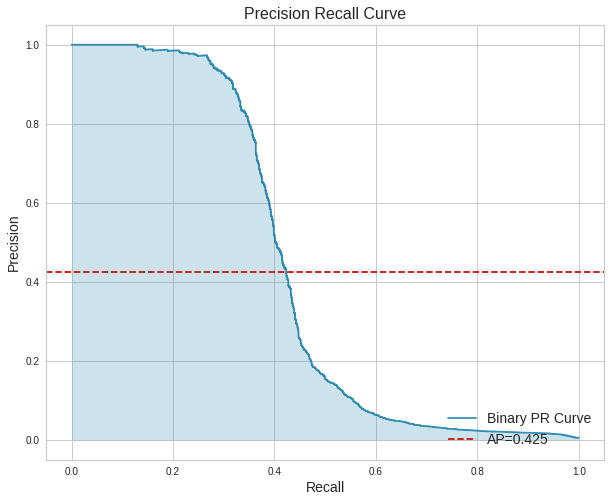

In [94]:
# Have some patience, might take some time :)
log  = LogisticRegression(random_state = 42)
log.fit(X_train, y_train)
y_pred = log.predict(X_test)

print('Accuracy Score (Train Data):', np.round(log.score(X_train, y_train), decimals = 3))
print('Accuracy Score (Test Data):', np.round(log.score(X_test, y_test), decimals = 3))

base_logistic_report = classification_report(y_test, y_pred)
print(base_logistic_report)

plt.figure(figsize = [10, 8])
PRCurve(model = log)
plt.show()

Accuracy Score (Train Data): 0.998
Accuracy Score (Test Data): 0.998
              precision    recall  f1-score   support

       False       1.00      1.00      1.00    290731
        True       0.99      0.67      0.80      1638

    accuracy                           1.00    292369
   macro avg       0.99      0.84      0.90    292369
weighted avg       1.00      1.00      1.00    292369



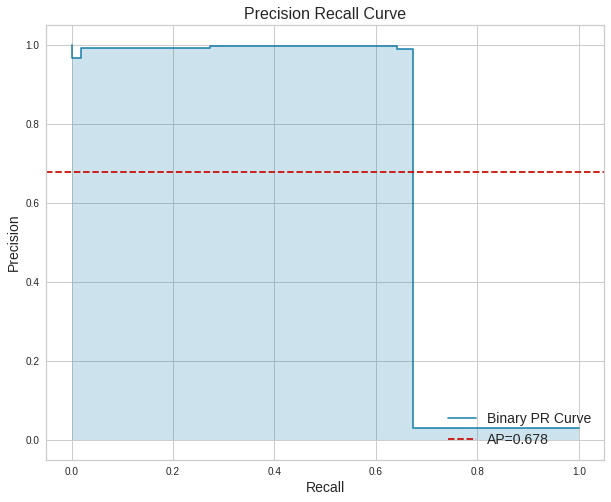

In [95]:
# Have some patience, might take some time :)
dtc = DecisionTreeClassifier(random_state = 42, max_depth = 5)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

print('Accuracy Score (Train Data):', np.round(dtc.score(X_train, y_train), decimals = 3))
print('Accuracy Score (Test Data):', np.round(dtc.score(X_test, y_test), decimals = 3))

base_decision_tree_report = classification_report(y_test, y_pred)
print(base_decision_tree_report)

plt.figure(figsize = [10, 8])
PRCurve(model = dtc)
plt.show()

Accuracy Score (Train Data): 0.998
Accuracy Score (Test Data): 0.998
              precision    recall  f1-score   support

       False       1.00      1.00      1.00    290731
        True       1.00      0.68      0.81      1638

    accuracy                           1.00    292369
   macro avg       1.00      0.84      0.90    292369
weighted avg       1.00      1.00      1.00    292369



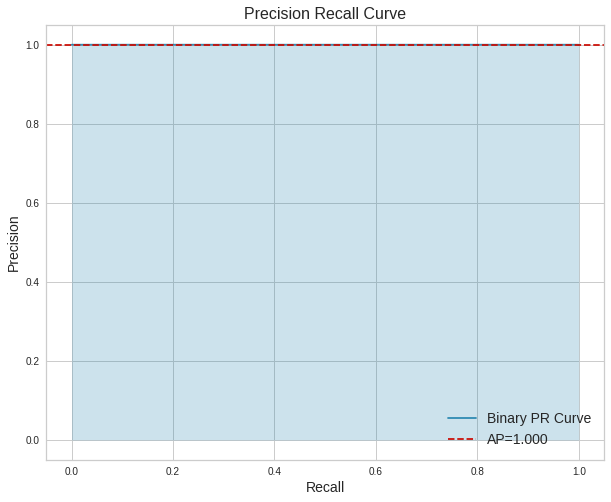

In [96]:
# Have some patience, might take some time :)
rfc = RandomForestClassifier(n_estimators = 100, max_depth = 5, random_state = 42, n_jobs = -1)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

print('Accuracy Score (Train Data):', np.round(rfc.score(X_train, y_train), decimals = 3))
print('Accuracy Score (Test Data):', np.round(rfc.score(X_test, y_test), decimals = 3))

base_random_forest_report = classification_report(y_test, y_pred)
print(base_random_forest_report)

plt.figure(figsize = [10, 8])
PRCurve(model = rfc)
plt.show()

**Observation:

Precision for minority class has improved but the recall is still low.
F1 score for minority class has also improved but still not good.
Average precision has imporoved significantly to 100%.
But we will see if we can further improve this development.
In next part we shall observe how XGBoost will work.**

Accuracy Score (Train Data): 1.0
Accuracy Score (Test Data): 1.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00    290731
        True       1.00      1.00      1.00      1638

    accuracy                           1.00    292369
   macro avg       1.00      1.00      1.00    292369
weighted avg       1.00      1.00      1.00    292369



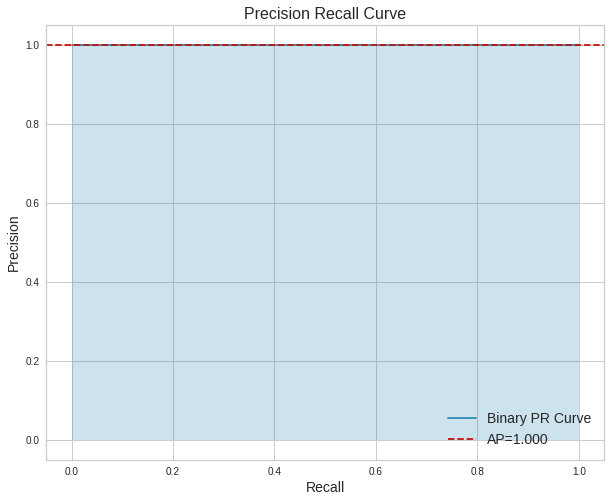

In [97]:

base_clf = XGBClassifier(max_depth = 5, n_jobs = -1, random_state = 42)
base_clf.fit(X_train, y_train)
y_pred = base_clf.predict(X_test)

print('Accuracy Score (Train Data):', np.round(base_clf.score(X_train, y_train), decimals = 3))
print('Accuracy Score (Test Data):', np.round(base_clf.score(X_test, y_test), decimals = 3))

base_XGB_report = classification_report(y_test, y_pred)
print(base_XGB_report)

plt.figure(figsize = [10, 8])
PRCurve(model = base_clf)
plt.show()